## Recommendations Worth a Million: An Introduction to Clustering

### Getting the Data

In [2]:
movies = read.table('./dataset/movieLens.txt', header=FALSE, sep='|', quote="\"")

In [3]:
str(movies)

'data.frame':	1682 obs. of  24 variables:
 $ V1 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2 : Factor w/ 1664 levels "Double vie de V\xe9ronique, La (Double Life of Veronique, The) (1991)",..: 1524 621 558 597 348 1317 1544 118 395 1239 ...
 $ V3 : Factor w/ 241 levels "","01-Aug-1997",..: 71 71 71 71 71 71 71 71 71 182 ...
 $ V4 : logi  NA NA NA NA NA NA ...
 $ V5 : Factor w/ 1661 levels "","http://us.imdb.com/M/title-exact/Independence%20(1997)",..: 1431 565 505 543 310 1661 1453 103 357 1183 ...
 $ V6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V7 : int  0 1 0 1 0 0 0 0 0 0 ...
 $ V8 : int  0 1 0 0 0 0 0 0 0 0 ...
 $ V9 : int  1 0 0 0 0 0 0 0 0 0 ...
 $ V10: int  1 0 0 0 0 0 0 1 0 0 ...
 $ V11: int  1 0 0 1 0 0 0 1 0 0 ...
 $ V12: int  0 0 0 0 1 0 0 0 0 0 ...
 $ V13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V14: int  0 0 0 1 1 1 1 1 1 1 ...
 $ V15: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V16: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V19: int  0 0 0 0 0

In [4]:
colnames(movies) = c("ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", "Action", 
                     "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", 
                    "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", "Mystery", "Romance", 
                    "SciFi", "Thriller", "War", "Western")

In [5]:
str(movies)

'data.frame':	1682 obs. of  24 variables:
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title           : Factor w/ 1664 levels "Double vie de V\xe9ronique, La (Double Life of Veronique, The) (1991)",..: 1524 621 558 597 348 1317 1544 118 395 1239 ...
 $ ReleaseDate     : Factor w/ 241 levels "","01-Aug-1997",..: 71 71 71 71 71 71 71 71 71 182 ...
 $ VideoReleaseDate: logi  NA NA NA NA NA NA ...
 $ IMDB            : Factor w/ 1661 levels "","http://us.imdb.com/M/title-exact/Independence%20(1997)",..: 1431 565 505 543 310 1661 1453 103 357 1183 ...
 $ Unknown         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action          : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure       : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation       : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens       : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy          : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime           : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama           : int  0 0 0 1 1 1 

In [6]:
movies$ID = NULL
movies$ReleaseDate = NULL
movies$VideoReleaseDate = NULL
movies$IMDB = NULL

In [7]:
movies = unique(movies)

In [8]:
str(movies)

'data.frame':	1664 obs. of  20 variables:
 $ Title      : Factor w/ 1664 levels "Double vie de V\xe9ronique, La (Double Life of Veronique, The) (1991)",..: 1524 621 558 597 348 1317 1544 118 395 1239 ...
 $ Unknown    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Action     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ Adventure  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Childrens  : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 0 1 0 0 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FilmNoir   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SciFi      : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Thriller   : int  0 1 1 0 1 0 0 0 0 0 ...
 $ War        : int  0 0 0 0 0 

In [9]:
table(movies$Comedy)


   0    1 
1162  502 

In [10]:
table(movies$Western)


   0    1 
1637   27 

In [11]:
table(movies$Romance, movies$Drama)

   
      0   1
  0 801 619
  1 147  97

### Hierarchical Clustering in R

In [12]:
distances = dist(movies[2:20], method='euclidean')

In [13]:
clusterMovies = hclust(distances, method="ward.D")

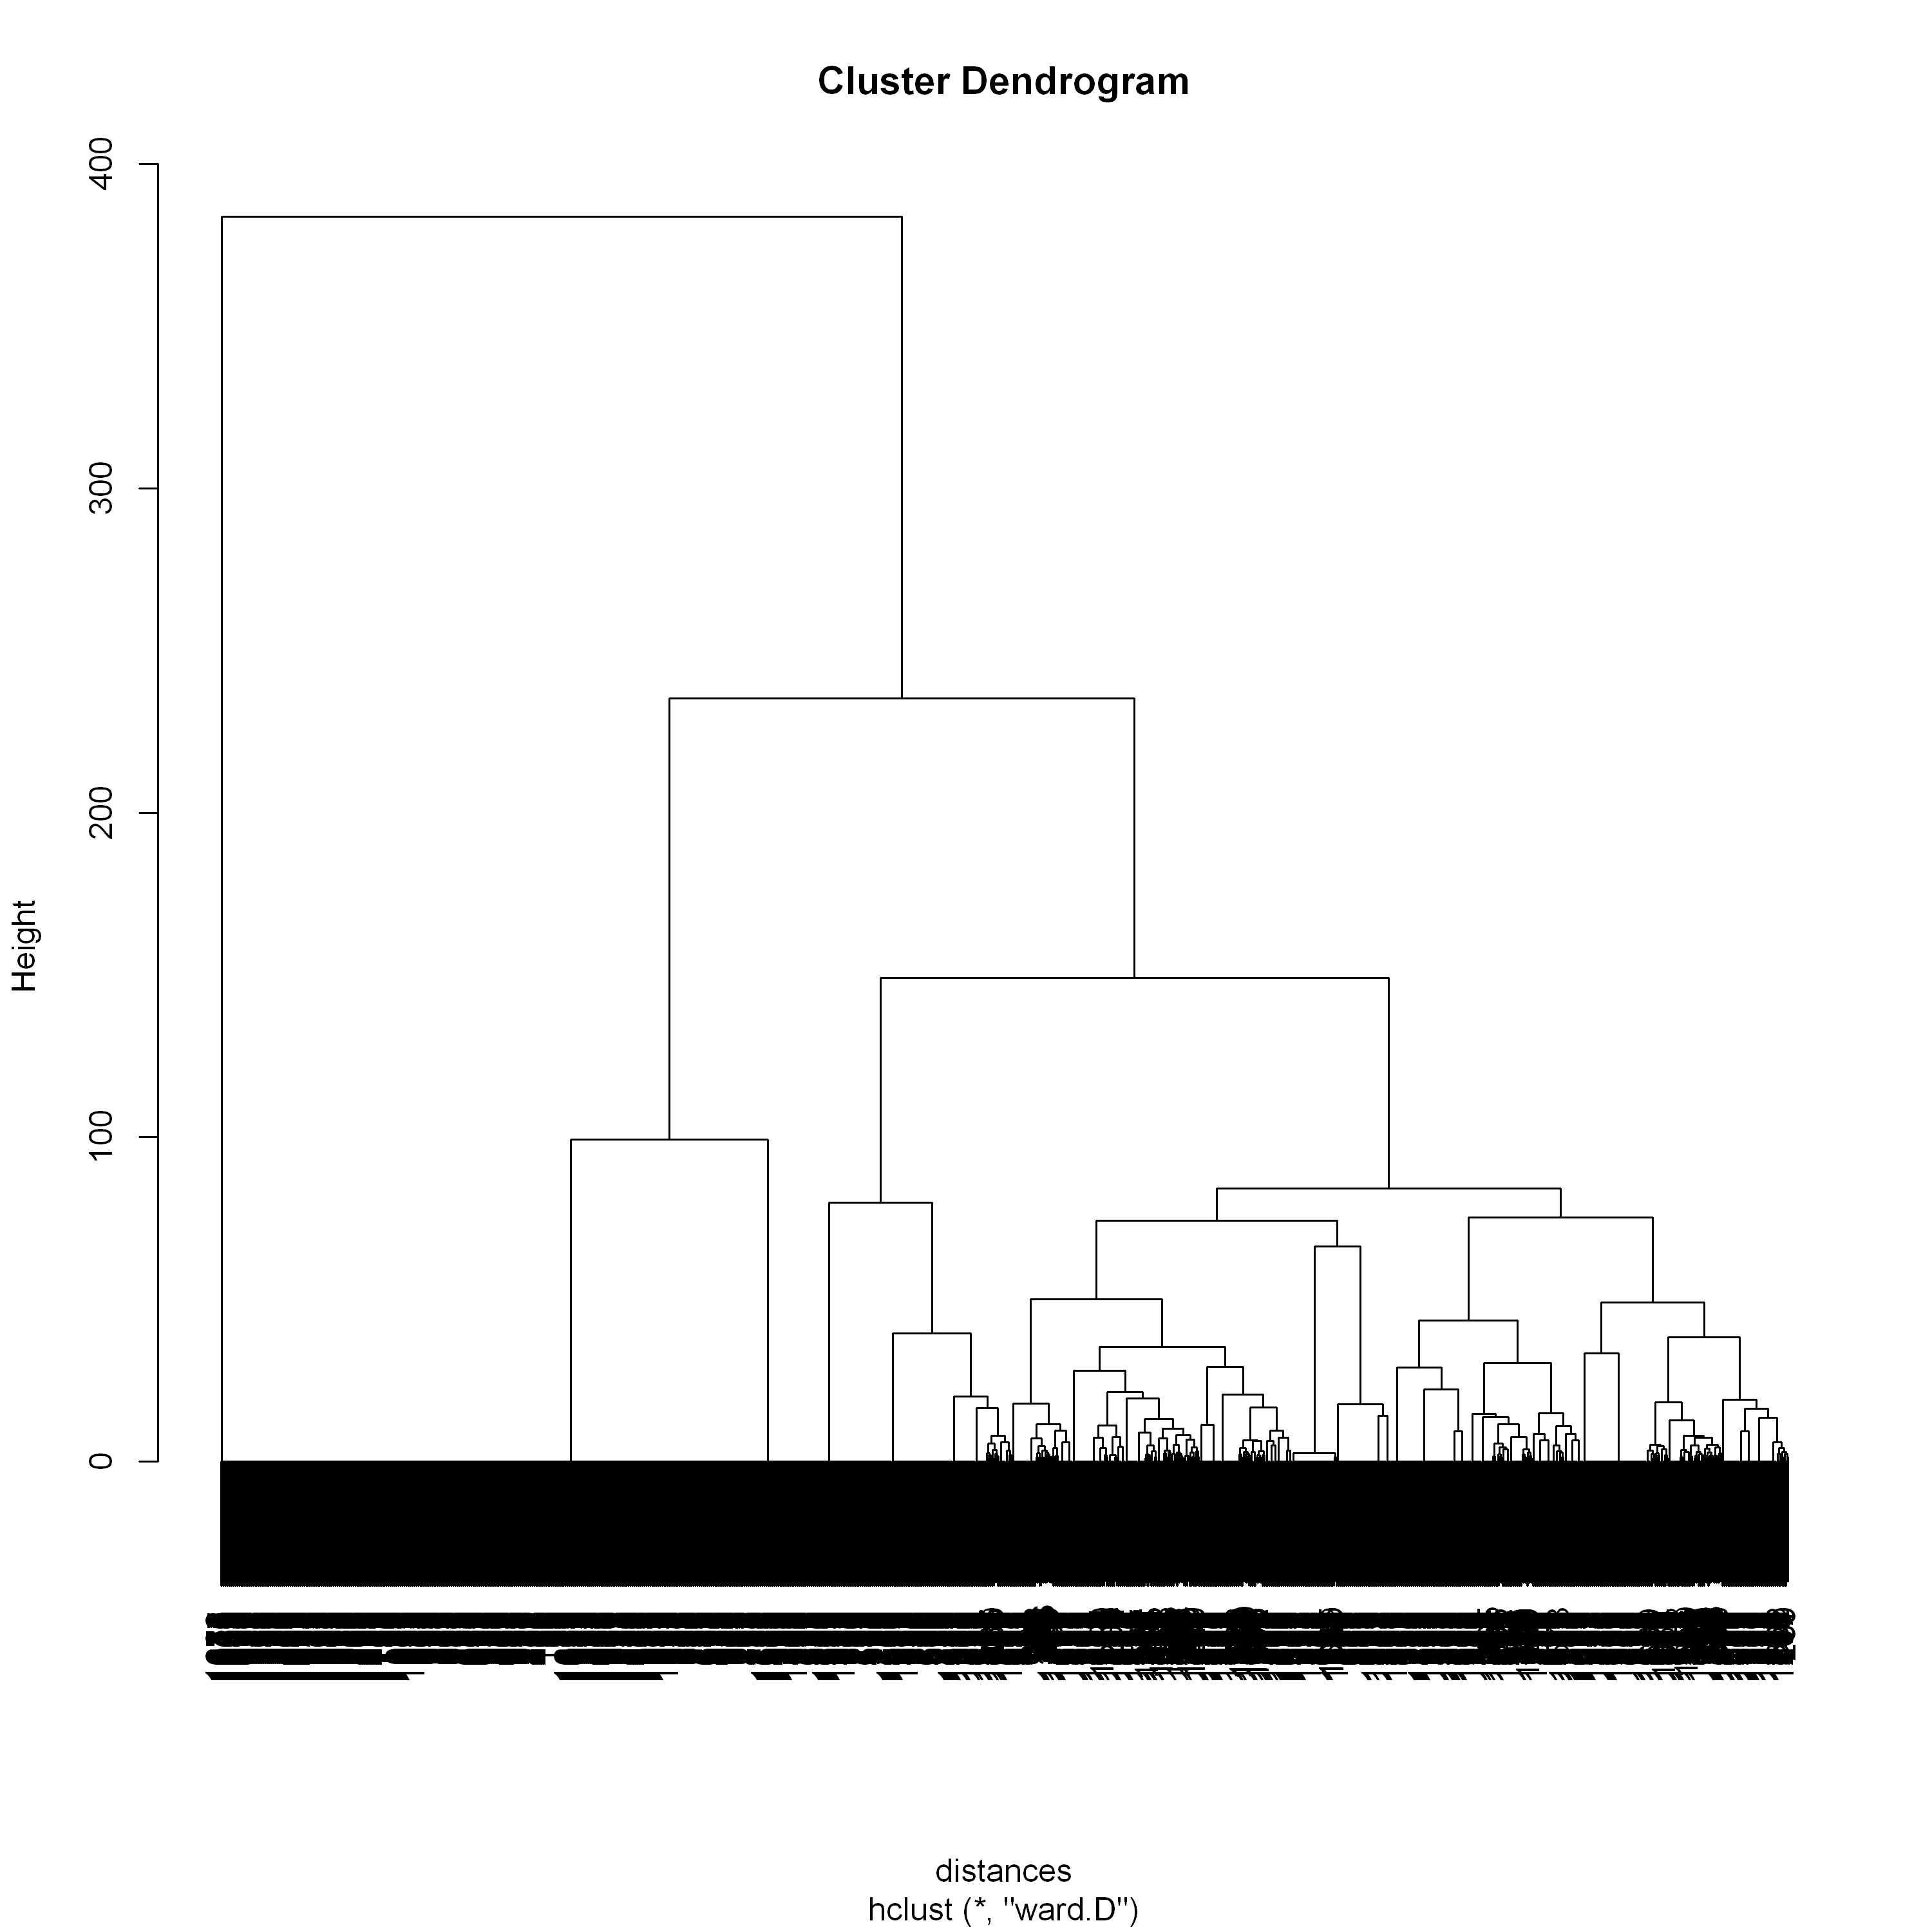

In [16]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res=300)
plot(clusterMovies)

In [17]:
clusterGroups = cutree(clusterMovies, k=10)

In [18]:
tapply(movies$Action, clusterGroups, mean)

1         2         3         4         5         6         7         8 
0.1784512 0.7839196 0.1238532 0.0000000 0.0000000 0.1015625 0.0000000 0.0000000 
        9        10 
0.0000000 0.0000000

In [19]:
tapply(movies$Romance, clusterGroups, mean)

1          2          3          4          5          6          7 
0.10437710 0.04522613 0.03669725 0.00000000 0.00000000 1.00000000 1.00000000 
         8          9         10 
0.00000000 0.00000000 0.00000000

In [20]:
subset(movies, Title == 'Men in Black (1997)')

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
257,Men in Black (1997),0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
clusterGroups[257]

257 
  2

In [22]:
cluster2 = subset(movies, clusterGroups == 2)

In [23]:
cluster2$Title[1:10]

[1] GoldenEye (1995)                              
 [2] Bad Boys (1995)                               
 [3] Apollo 13 (1995)                              
 [4] Net, The (1995)                               
 [5] Natural Born Killers (1994)                   
 [6] Outbreak (1995)                               
 [7] Stargate (1994)                               
 [8] Fugitive, The (1993)                          
 [9] Jurassic Park (1993)                          
[10] Robert A. Heinlein's The Puppet Masters (1994)
1664 Levels: Double vie de V\xe9ronique, La (Double Life of Veronique, The) (1991) ...

#### An Advanced Approach to Finding Cluster Centroids

In this video, we explain how you can find the cluster centroids by using the function "tapply" for each variable in the dataset. While this approach works and is familiar to us, it can be a little tedious when there are a lot of variables. An alternative approach is to use the colMeans function. With this approach, you only have one command for each cluster instead of one command for each variable. If you run the following command in your R console, you can get all of the column (variable) means for cluster 1:
```R
colMeans(subset(movies[2:20], clusterGroups == 1))
```
You can repeat this for each cluster by changing the clusterGroups number. However, if you also have a lot of clusters, this approach is not that much more efficient than just using the tapply function.

A more advanced approach uses the "split" and "lapply" functions. The following command will split the data into subsets based on the clusters:
```R
spl = split(movies[2:20], clusterGroups)
```
Then you can use spl to access the different clusters, because
```R
spl[[1]]
```
is the same as
```R
subset(movies[2:20], clusterGroups == 1)
```
so colMeans(spl[[1]]) will output the centroid of cluster 1. But an even easier approach uses the lapply function. The following command will output the cluster centroids for all clusters:
```R
lapply(spl, colMeans)
```
The lapply function runs the second argument (colMeans) on each element of the first argument (each cluster subset in spl). So instead of using 19 tapply commands, or 10 colMeans commands, we can output our centroids with just two commands: one to define spl, and then the lapply command.

Note that if you have a variable called "split" in your current R session, you will need to remove it with rm(split) so that you can use the split function.

### Quick Question

In [24]:
clusterGroups2 = cutree(clusterMovies, k=2)

In [26]:
tapply(movies$Action, clusterGroups2, mean)

1         2 
0.1924266 0.0000000

In [32]:
tapply(movies$Comedy, clusterGroups2, mean)

1         2 
0.3879444 0.0000000

In [35]:
tapply(movies$Drama, clusterGroups2, mean)

1         2 
0.2673879 1.0000000

In [45]:
tapply(movies$Western, clusterGroups2, mean)

1          2 
0.02086553 0.00000000

In [50]:
colMeans(subset(movies[2:20], clusterGroups2 == 2))

Unknown      Action   Adventure   Animation   Childrens      Comedy 
          0           0           0           0           0           0 
      Crime Documentary       Drama     Fantasy    FilmNoir      Horror 
          0           0           1           0           0           0 
    Musical     Mystery     Romance       SciFi    Thriller         War 
          0           0           0           0           0           0 
    Western 
          0